## Distancias de huida de aves de Europa frente a America-Australia

Las migraciones de los seres humanos han sido acompañadas de extinciones masivas de la fauna allá donde se han desplazado desde que partieron de Africa. <i>Homo sapiens</i> llego a Europa hace 150.000 años aproximadamente, colonizó el continente australiano desde Eurasia hace al menos 65.000 años, y finalmente la presencia humana en America se data en hace 30.000 años. La hipótesis es que los animales que han "conocido" a los humanos más recientemente tienen distancias de iniciacion de huida (FID, flight innitiation distance) mayores, por lo tanto se esperaría que las especies de aves en Europa tuvieran las distancias menores en comparación con aquellas de otros contientes ya que han coevolucionado más tiempo con <i>Homo sapiens</i>.

In [62]:
library(ggplot2)#graphic grammar
library(dplyr)#to organize data
library(car)#qqplots and others
library(lmtest)#test homogeneidad de varianza
library(effsize)#libreria para tamaños de efecto Cohen d

In [63]:
FID.data<-read.csv("birdFID.csv")
head(FID.data,10)#primeras 10 lineas de datos

,X,Continent,Disturbance,Order,Family,Scientific.name,Common.name,FID,log.fid
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,America-Australia,Pedestrian,Anseriformes,Anatidae,Anas castanea,chestnut teal,80.1,1.903633
2,2,America-Australia,Pedestrian,Anseriformes,Anatidae,Anas castanea,chestnut teal,76.9,1.885926
3,3,America-Australia,Pedestrian,Anseriformes,Anatidae,Anas castanea,chestnut teal,85.4,1.931458
4,4,America-Australia,Pedestrian,Anseriformes,Anatidae,Anas gracilis,grey teal,78.0,1.892095
5,5,America-Australia,Pedestrian,Anseriformes,Anatidae,Anas gracilis,grey teal,82.8,1.918030
6,6,America-Australia,Pedestrian,Anseriformes,Anatidae,Anas gracilis,grey teal,82.5,1.916454
7,7,America-Australia,Pedestrian,Anseriformes,Anatidae,Anas superciliosa,Pacific black duck,107.5,2.031408
8,8,America-Australia,Pedestrian,Anseriformes,Anatidae,Anas superciliosa,Pacific black duck,89.1,1.949878
9,9,America-Australia,Pedestrian,Anseriformes,Anatidae,Anas superciliosa,Pacific black duck,97.9,1.990783


In [64]:
#sumario de estadisticos para cada grupo
FID.data%>%
  group_by(Continent)%>%
  summarise(mean=mean(FID),median=median(FID),min=min(FID),
            max=max(FID),std=sd(FID),
            len=length(FID))

,Continent,mean,median,min,max,std,len
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,America-Australia,27.31348,17.000,1.00,225,27.31681,606
2,Europe,21.05715,10.105,2.62,339,34.56178,424


In [65]:
# sort the dataframe in R using arrange
FID.data %>% 
arrange(desc(FID))#los mas miedosos

X,Continent,Disturbance,Order,Family,Scientific.name,Common.name,FID,log.fid
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
549,Europe,Pedestrian,Charadriiformes,Scolopacidae,Numenius arquata,Eurasian curlew,339.00,2.530200
516,Europe,Pedestrian,Anseriformes,Anatidae,Tadorna tadorna,shelduck,250.00,2.397940
971,America-Australia,Pedestrian,Falconiformes,Accipitridae,Aguila chrysaetos,golden eagle,225.00,2.352183
545,Europe,Pedestrian,Charadriiformes,Scolopacidae,Limosa lapponica,bar-tailed godwit,219.00,2.340444
547,Europe,Pedestrian,Charadriiformes,Scolopacidae,Numenius arquata,Eurasian curlew,213.00,2.328380
548,Europe,Pedestrian,Charadriiformes,Scolopacidae,Numenius arquata,Eurasian curlew,211.00,2.324282
511,Europe,Pedestrian,Anseriformes,Anatidae,Cygnus columbianus,tundra swan,200.00,2.301030
972,America-Australia,Pedestrian,Falconiformes,Accipitridae,Buteo lagopus,rough-legged hawk,177.00,2.247973
541,Europe,Pedestrian,Charadriiformes,Scolopacidae,Calidris alpina,dunlin,163.00,2.212188


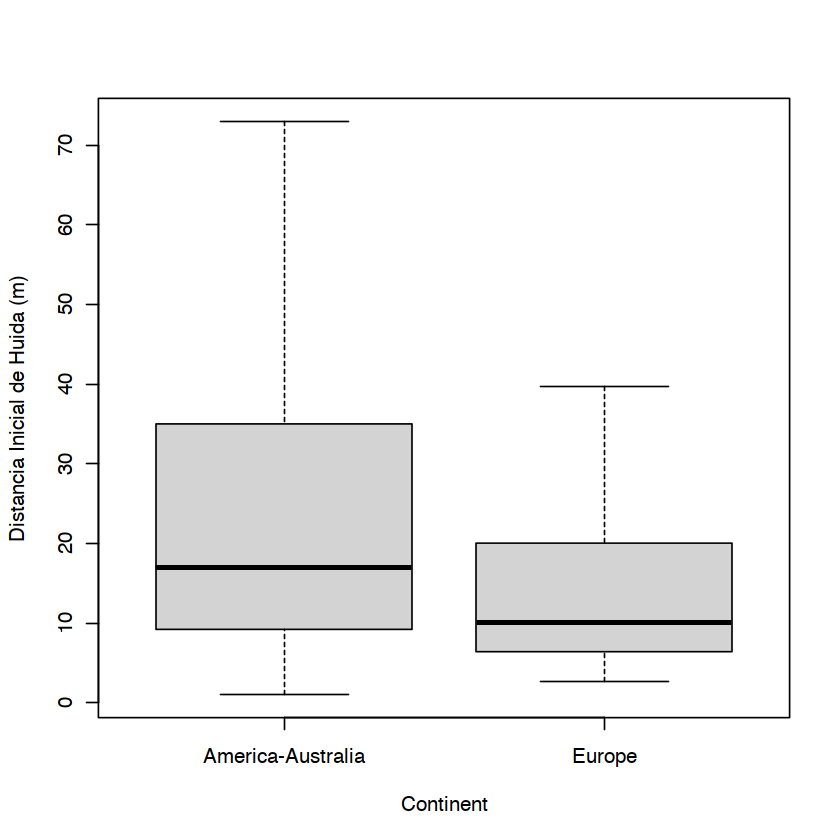

In [66]:
boxplot(FID~Continent,data=FID.data,
        axes=T,outline=F,ylab="Distancia Inicial de Huida (m)")

Warning message:
“Removed 80 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 80 rows containing non-finite values (stat_summary).”


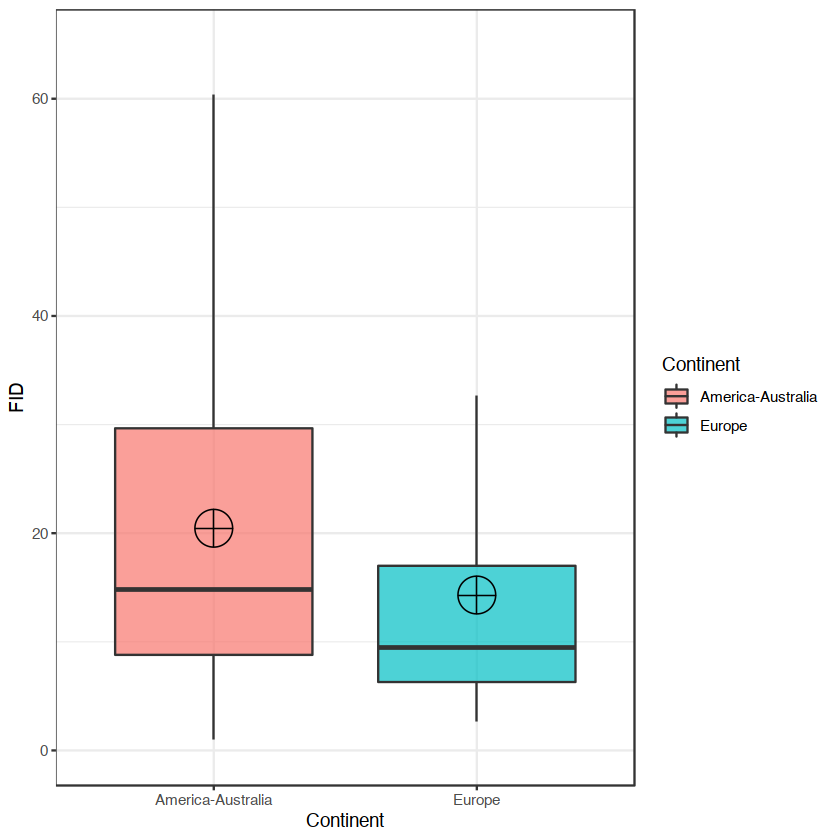

In [67]:
ggplot(FID.data, aes(x=Continent, y=FID, fill=Continent)) +
    geom_boxplot(alpha=0.7,outlier.shape=NA) +
    stat_summary(fun=mean, geom="point", shape=10, size=10, color="black", fill="red") +
    theme(legend.position="none")+
  ylim(0,65)+theme_bw()#la cruz indica la media

**Supuestos estadísticos**

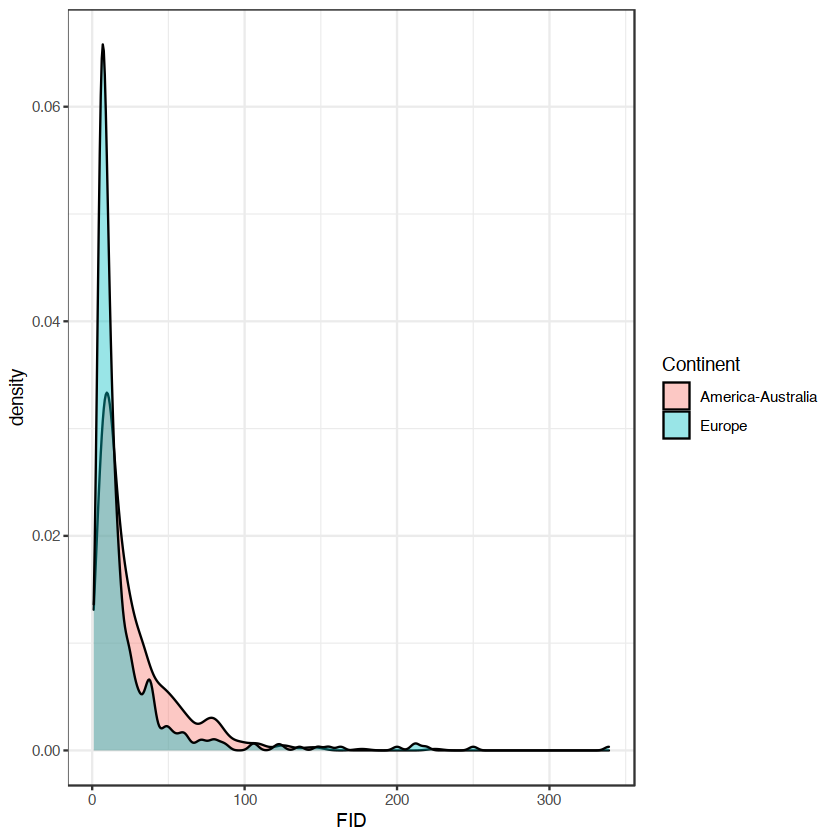

In [68]:
#normalidad
ggplot(FID.data,aes(x=FID,fill=Continent))+
  geom_density(alpha=0.4)+theme_bw()
#los FID no son normales para ningun grupo como se ve claramente en esta figura de densidad de FID
#asimetria positiva, hay muchas distancias concentradas entre 0 y 20m

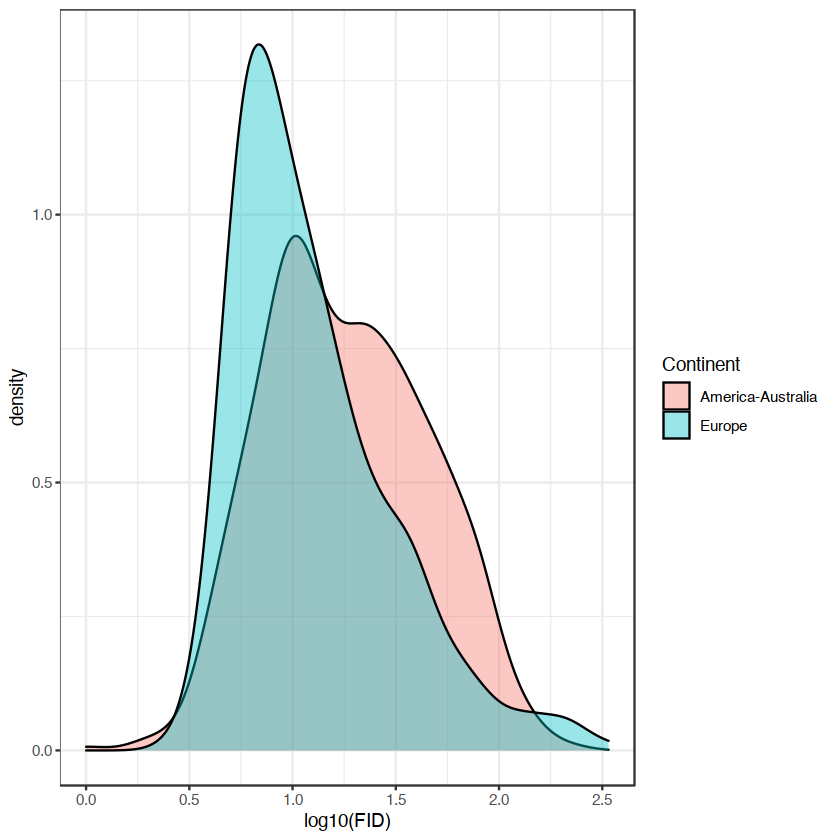

In [69]:
#transformando los datos a logaritmos en base 10
ggplot(FID.data,aes(x=log10(FID),fill=Continent))+
  geom_density(alpha=0.4)+theme_bw()
#las FID se normalizan, pero el qqplot abajo deja claramente que siguen sin ser normales

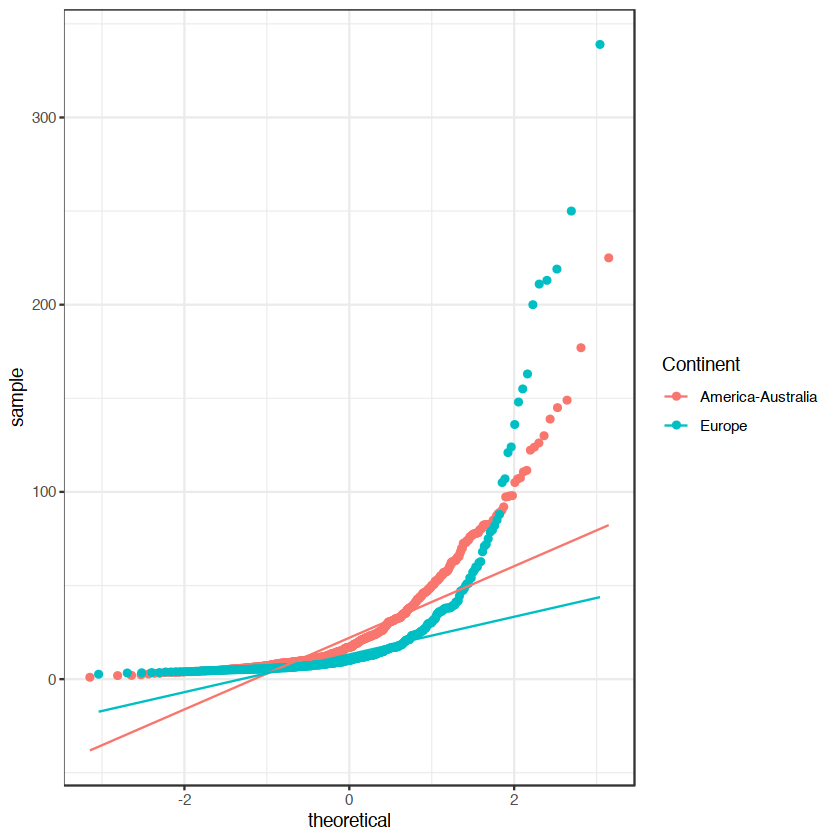

In [70]:
ggplot(FID.data, aes(sample = FID,color=Continent))+stat_qq() + stat_qq_line() + theme_bw()#no es necesario hacer
#un ks test

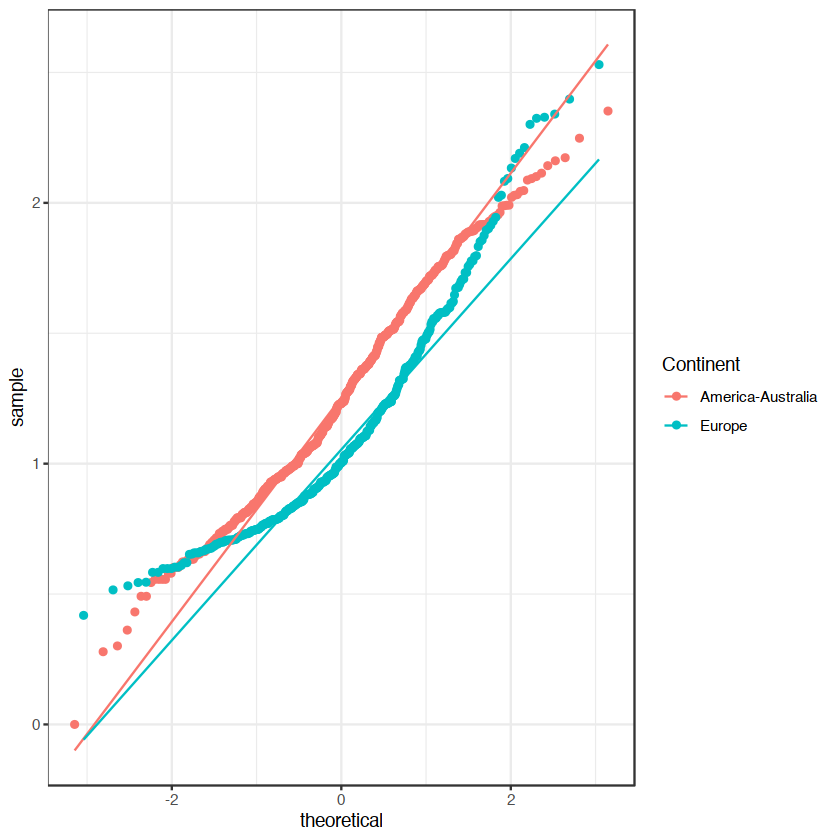

In [71]:
ggplot(FID.data, aes(sample = log10(FID),color=Continent))+stat_qq() + stat_qq_line() + theme_bw()

In [72]:
leveneTest(log.fid~as.factor(Continent),data=FID.data)#no hay homogeneidad de varianza entre grupos

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,5.772112,0.01645893
,1028,NA,NA


In [73]:
dwtest(log.fid~Continent,data=FID.data)#tampoco hay indepencia de observaciones


	Durbin-Watson test

data:  log.fid ~ Continent
DW = 0.54692, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


Necesitamos un análisis no paramétrico (Wilcoxon Rank Sum) para comparar los dos grupos

In [74]:
(mu.test<-wilcox.test(FID~Continent,data=FID.data))


	Wilcoxon rank sum test with continuity correction

data:  FID by Continent
W = 163098, p-value = 1.711e-13
alternative hypothesis: true location shift is not equal to 0


In [75]:
Zstat<-qnorm(mu.test$p.value/2)

In [76]:
abs(Zstat)/sqrt(606+424)#tamano de efecto moderado:

[1] 0.2296296

In [77]:
FID.data%>%
  group_by(Continent)%>%
  summarise(mean=mean(FID),median=median(FID),min=min(FID),
            max=max(FID),std=sd(FID),
            len=length(FID))

,Continent,mean,median,min,max,std,len
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,America-Australia,27.31348,17.000,1.00,225,27.31681,606
2,Europe,21.05715,10.105,2.62,339,34.56178,424


**Interpretación estadística**. La FID presentada por las especies de aves en Europa (mediana = 10 metros) es menor que el presentado en las especies en America y Australia (mediana = 17), esta diferencia de 7 metros fue altamente significativa (W = 163098, p <0.001, n1 = 424, n2 = 606). El tamaño del efecto correspondiente a esta diferencia es moderado (0,23).